In [153]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas import DataFrame as df
import os
import sys
import datetime

sys.path.append(os.path.abspath("../"))
from shibaer import util, features
pd.options.display.float_format = "{:.2f}".format

tprint = lambda s: print('\n--- %s ---' %s)
pprint=lambda i: '%i (%.2f)' %(i,float(i)/len(fraud_events))
hour_diff = lambda i:i.total_seconds()/360 if type(i) is not None else i

def stack_plot(data, index_axis, stack_var='age',title=None, ylim=None):
    if title is None:
        title=stack_var +' by ' + index_axis.dtype
    data[stack_var].groupby(index_axis).value_counts().unstack().plot(kind='bar', 
                                                                      stacked=True, figsize=(20,5), title=title, ylim=ylim)
    
def plot_with_legend(data,group_var='gender', plot_var='age_on_date',drop_values=[]):
    fig, ax = plt.subplots()
    groups = data.groupby(group_var)[plot_var]
    for k, v in groups:
        if k not in drop_values:
            v.hist(label=k, alpha=.75, ax=ax, bins = 40)
    ax.legend()
    
thumbdrive = 'KINGSTON'
data_dir = 'ER'
data = util.load_pickle_files(thumbdrive, data_dir, is_small=False)
data_with_targets = features.add_death_columns(data)
target_variables = [d for d in data_with_targets.columns if 'T_' in d]
target_variables

data.columns


Found the following pickle files:  ['2013 PROC 4.8.18.pkl', '2014 PROC 4.8.18.pkl', '2015 PROC 4.8.18.pkl', '2016 PROC 4.8.18.pkl', '2017 PROC 4.8.18.pkl', 'small_pickle.pkl']
Loading : 2013 PROC 4.8.18.pkl
Loading : 2014 PROC 4.8.18.pkl
Loading : 2015 PROC 4.8.18.pkl
Loading : 2016 PROC 4.8.18.pkl
Loading : 2017 PROC 4.8.18.pkl
Loading : small_pickle.pkl
Finished loading data
Total number of rows:  605673


Index(['Albumin -Blood', 'Alkaline phosphatase -Blood', 'Amylase -Blood',
       'Bilirubin -Blood, total', 'CK-MB%', 'CPK -Blood ,total', 'CPK-MB',
       'CRP (Inflammatory)', 'Calcium -Blood, total', 'Chloride -Blood',
       ...
       'in_room_saturation', 'is_hospitalization', 'T_is_dead',
       'T_release_date', 'T_total_time_hospital', 'T_mortality_ER',
       'T_mortality_hospitalization', 'T_mortality2d', 'T_mortality30d',
       'T_mortality60d'],
      dtype='object', length=109)

In [136]:
def plot_events_by_time(death_events, by_time, stack_var = ''):
    death_events.sort_values(by=by_time)
    times = pd.DatetimeIndex(death_events[by_time])
    stack_plot(death_events, index_axis = [times.month,times.year], 
               stack_var=stack_var, title = 'Death %s by %s month' %(stack_var,by_time))
    print('')

84723
24678

--- Relative time of death after T_release_date (uniqe id_coded) 48-h  ---


Index(['Albumin -Blood', 'Alkaline phosphatase -Blood', 'Amylase -Blood',
       'Bilirubin -Blood, total', 'CK-MB%', 'CPK -Blood ,total', 'CPK-MB',
       'CRP (Inflammatory)', 'Calcium -Blood, total', 'Chloride -Blood',
       ...
       'in_room_saturation', 'is_hospitalization', 'T_is_dead',
       'T_release_date', 'T_total_time_hospital', 'T_mortality_ER',
       'T_mortality_hospitalization', 'T_mortality2d', 'T_mortality30d',
       'T_mortality60d'],
      dtype='object', length=109)

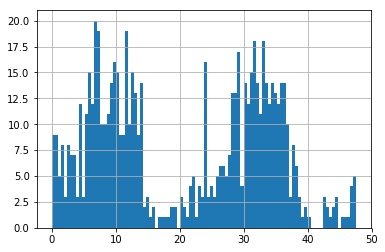

In [173]:
import datetime


death_data = data_with_targets.loc[data_with_targets.T_is_dead]
print(len(death_data))
death_data = death_data.sort_values('admission_date_min').drop_duplicates(subset =['id_coded'], keep='last')

print(len(death_data))



def plot_time_of_death_from(time_from='admission_date_min', drop_negatives=True, as_time='D', max_period= 1200):
    death_delta= (death_data.death_date - death_data[time_from])/np.timedelta64(1,as_time)
    if drop_negatives:
        death_delta = death_delta.loc[death_delta>0] #remove negative death deltas
    death_delta.loc[death_delta<=max_period].hist(bins=100)
    #death_days_from_admission.hist()
    tprint('Relative time of death after %s (uniqe id_coded) %i-%s '%(time_from,max_period,as_time))
    return death_delta


dd=plot_time_of_death_from(time_from='T_release_date',max_period=48, as_time='h')
data.columns

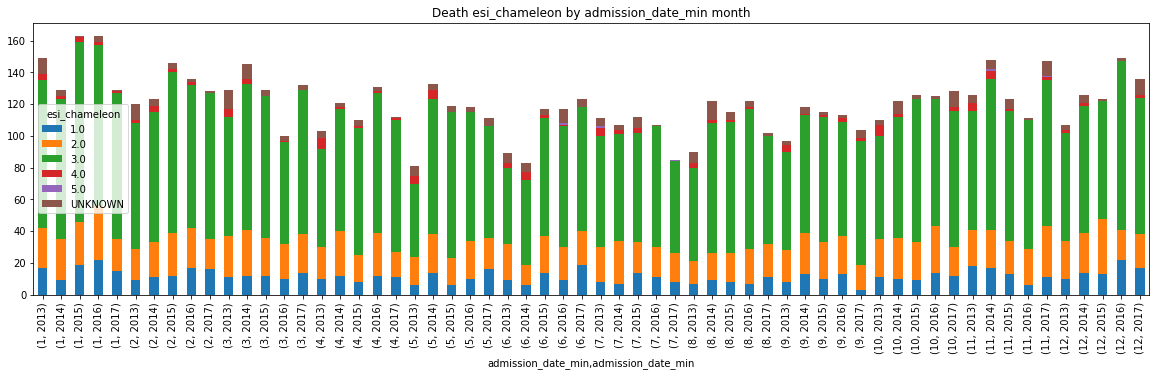

In [180]:
plot_events_by_time(death_data.loc[death_data.T_mortality_hospitalization], by_time='admission_date_min',stack_var = 'esi_chameleon')

#death_data.groupby().count()['gender'].plot(kind='bar')
#stack_var
#death_data.head()

T_is_dead                         False    True 
Chloride -Blood         count 256483.00 53179.00
                        mean     102.59   100.87
                        std        3.76     6.25
                        min       51.00    53.00
                        25%      101.00    97.00
                        50%      103.00   101.00
                        75%      105.00   104.00
                        max      185.00   157.00
Cholesterol, total      count   6098.00  3427.00
                        mean     158.31   148.96
                        std       48.68    50.79
                        min       13.00     5.00
                        25%      125.00   116.00
                        50%      153.00   142.00
                        75%      185.00   174.00
                        max      782.00  1245.00
HbA1C %                 count   4535.00  2353.00
                        mean       6.40     6.72
                        std        1.56     1.68
                        min        3.50     3.60
                        25%        5.40     5.60
                        50%        5.90     6.30
                        75%        6.90     7.40
                        max       19.00    16.30
LDL Cholesterol, direct count   6090.00  3422.00
                        mean     101.64    95.77
                        std       35.74    39.02
                        min       13.00    15.00
                        25%       76.00    71.00
                        50%       97.00    90.00
...                                 ...      ...
pulse                   std      288.81   321.06
                        min       -1.00    -1.00
                        25%       70.00    71.00
                        50%       80.00    83.00
                        75%       91.00    97.00
                        max    90100.00 91123.00
respiratory_rate        count 126245.00 36885.00
                        mean      17.24    22.16
                        std       73.39   233.27
                        min        0.00     0.00
                        25%       14.00    16.00
                        50%       16.00    18.00
                        75%       18.00    22.00
                        max    20117.00 24366.00
saturation              count 376965.00 66789.00
                        mean      97.69    95.15
                        std       28.74    32.99
                        min        0.00     0.00
                        25%       96.00    94.00
                        50%       98.00    96.00
                        75%       99.00    98.00
                        max     9898.00  8435.00
sbp                     count 450202.00 81453.00
                        mean     132.40   131.90
                        std       23.19    27.75
                        min       10.00     0.00
                        25%      116.00   113.00
                        50%      129.00   130.00
                        75%      146.00   149.00
                        max      795.00   268.00

[160 rows x 2 columns]

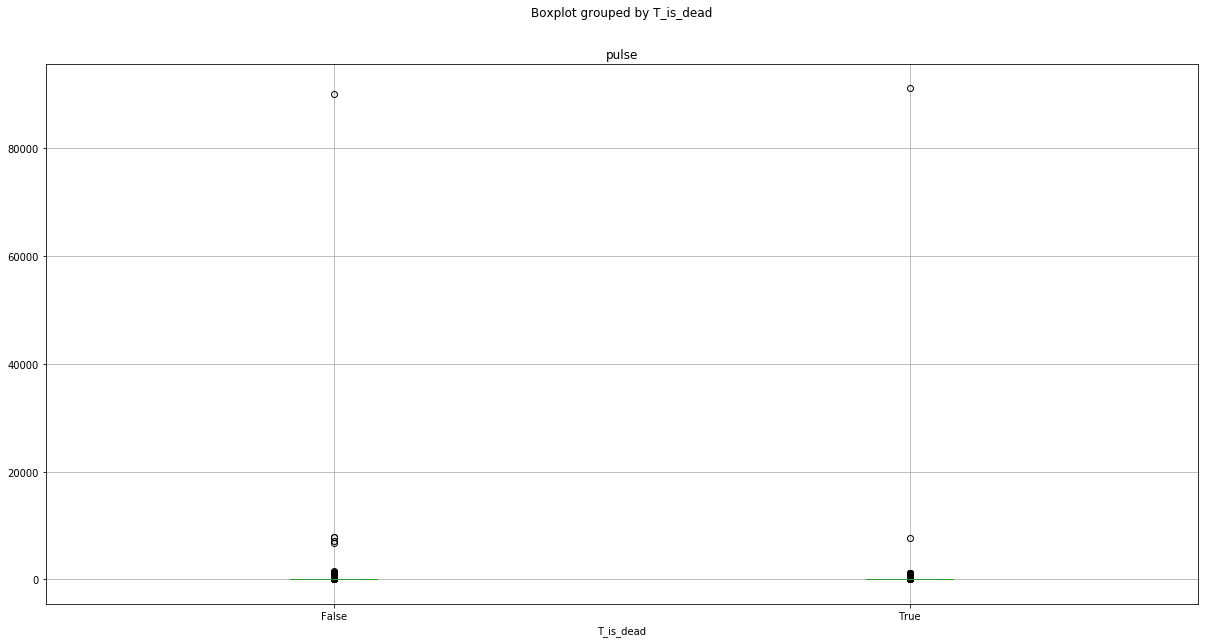

In [171]:
target_cols= ['pulse']
group_by_col = 'T_is_dead'
#clean_data = data_with_targets.loc[datw_with_targets]
data_with_targets.loc[data_with_targets.is_hospitalization].boxplot(by=group_by_col,column=target_cols,figsize= (20,10))
data_with_targets.groupby(group_by_col).describe().T

#plot_with_legend(death_data)
#plot_with_legend(data_with_targets, group_var='T_is_dead', plot_var='age_on_date',drop_values=[] )



## Descriptive Statistics

In [163]:
md= pd.read_csv(os.path.abspath("../docs/ER/meta_data.csv"))
md= md.loc[md.is_load==1]

data_timestamp_index = 'rss_timestamp'
#print(md.head())
print('\n---- ER data categories : ------')
print(md.groupby('category').nunique()['column_name'])
print('\n---- When was the  data gathered : ------')
print(md.groupby('when (b=before, a=after)').nunique()['column_name'])

demographic_cols = md.loc[md.category == 'demographic']['column_name']
demographic_data = data[demographic_cols]

tprint('demographic details (all)')

pd.options.display.float_format = "{:.2f}".format
groups.describe()

def plot_with_legend(data,group_var='gender', plot_var='age_on_date',drop_values=[]):
    fig, ax = plt.subplots()
    groups = data.groupby(group_var)[plot_var]
    for k, v in groups:
        if k not in drop_values:
            v.hist(label=k, alpha=.75, ax=ax, bins = 40)
    ax.legend()
#demographic_data.groupby('gender').plot(kind='bar')
#[])

#demographic_data['gender'].value_counts())



---- ER data categories : ------
category
Clinical evaluation             10
Labs                            47
Medical background               5
Outcome                         19
Outcome + Medical background     1
demographic                      4
Name: column_name, dtype: int64

---- When was the  data gathered : ------
when (b=before, a=after)
a    20
b    17
Name: column_name, dtype: int64

--- demographic details (all) ---


NameError: name 'groups' is not defined

## where were people commited?

In [4]:
tprint('commited units:')
print(fraud_events.fraud_type.value_counts())    
    
nunique=fraud_events.nunique()
ncount=fraud_events.count()
nnunique=pd.concat([ncount,nunique],axis=1)
nnunique.columns=[ 'count','unique vals']
tprint('Number of values in each fraud label column:')
print(nnunique.loc[label_cols].applymap(pprint))#.applymap(pprint))
tprint('Number of values in each rss_data column:')
print(nnunique.loc[relevant_data_cols].applymap(pprint))

f


--- commited units: ---


NameError: name 'fraud_events' is not defined

In [6]:
death_data=data_with_targets[data_with_targets.T_is_dead==True]
death_data.

['T_is_dead',
 'T_release_date',
 'T_total_time_hospital',
 'T_mortality_ER',
 'T_mortality_hospitalization',
 'T_mortality2d',
 'T_mortality30d',
 'T_mortality60d']